# Pytorch_5_Proste sieci neuronowe_torch.nn.Sequential

19:55

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

### Krok 1. Tworzenie zbioru danych 

In [2]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('c:/2/Energy.csv', nrows=1000)
# , ,parse_dates=['Date'],usecols = ['Unnamed: 0','Date','Consumption']

print(df.shape)
print(df.dtypes)
print(df['Unnamed: 0'].max())
print(df.columns)
df.head(3)

(1000, 6)
Unnamed: 0       int64
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object
999
Index(['Unnamed: 0', 'Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')


,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN


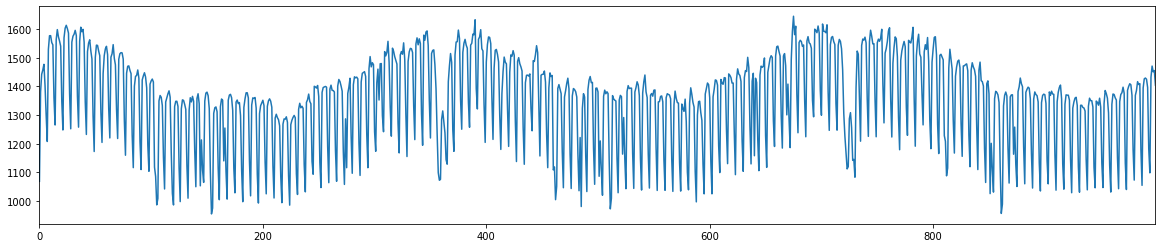

In [3]:
df['Unnamed: 0'] = df['Unnamed: 0'].astype(float)

X = df['Unnamed: 0']
y = df['Consumption']

df['Consumption'].plot(figsize=(20,4))


In [4]:
x = torch.tensor(df['Unnamed: 0'], dtype=torch.float)
y = torch.tensor(df['Consumption'], dtype=torch.float)

In [5]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

### Krok 2. Definiowanie sieci neuronowej
##### 2.1 Programowanie torch.nn.Module

In [6]:

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Sequential(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Sequential(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

##### 2.2 Definicja krztałtu sieci
Ta sieć ma tylko jedną ukrytą warstwę, ale teraz ma 150 węzłów, a po nim następuje funkcja LeakyReLu.

In [7]:
net = torch.nn.Sequential(
        torch.nn.Linear(1, 150),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(150, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )  

##### 2.2 Algorytm optymalizacji: Optymalizator ADAM
lr: Szybkość uczenia się -> Szybkość, z jaką nasz model aktualizuje wagi w komórkach za każdym razem, gdy przeprowadzana jest wsteczna propagacja

In [8]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

Optymalizator ADAM zamiast użytego optymalizatora SGD, działa lepiej dla powykręcanego zbioru danych empirycznych. Należy przetestować różne rodzaje optymalizatorów.

klasa torch.optim.Adam (parametry, lr = 0,001, betas = (0,9, 0,999), eps = 1e-08, weight_decay = 0)

In [9]:
#optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [10]:
#optimizer = torch.optim.Adamax(net.parameters(), lr=0.01)

In [11]:
#optimizer = torch.optim.ASGD(net.parameters(), lr=0.01, lambd=0.0001, alpha=0.65, t0=1000000.0)

bardzo dobre efekty

In [12]:
optimizer = torch.optim.Rprop(net.parameters(), lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50))

##### 2.2 Definicja funkcji straty
to jest R2 dla regresji

In [13]:
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

### Krok 3. Definiowanie procesu nauki i nauka

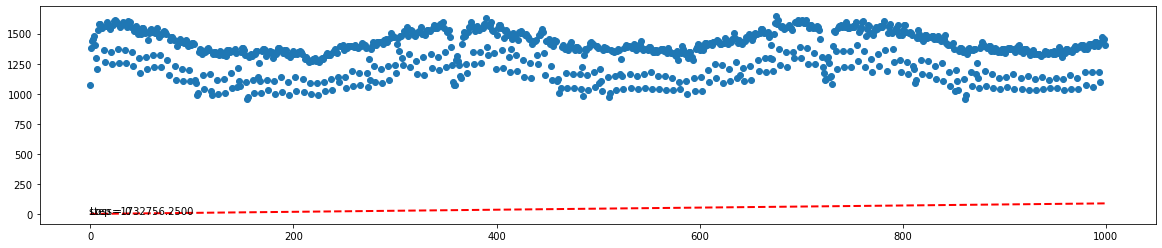

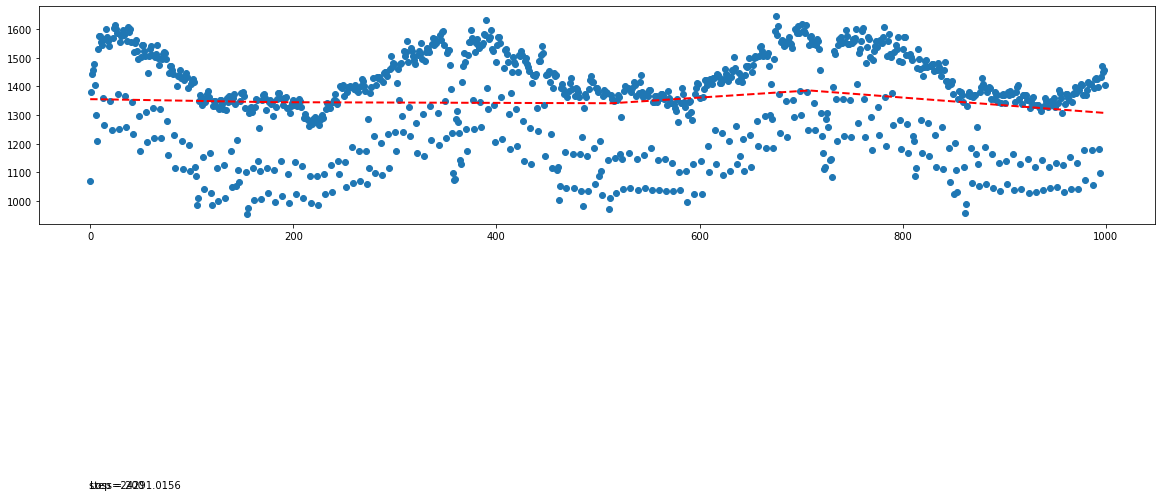

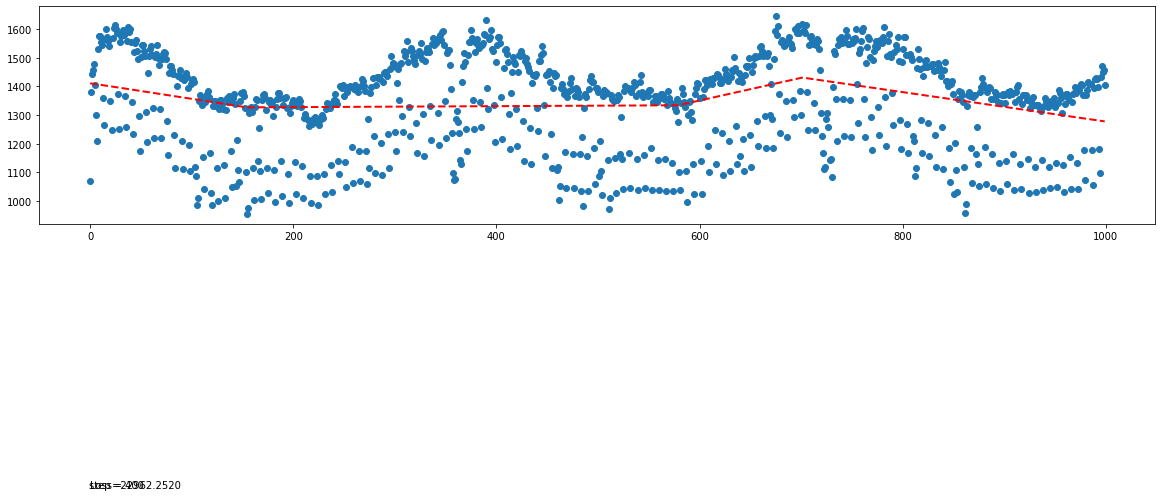

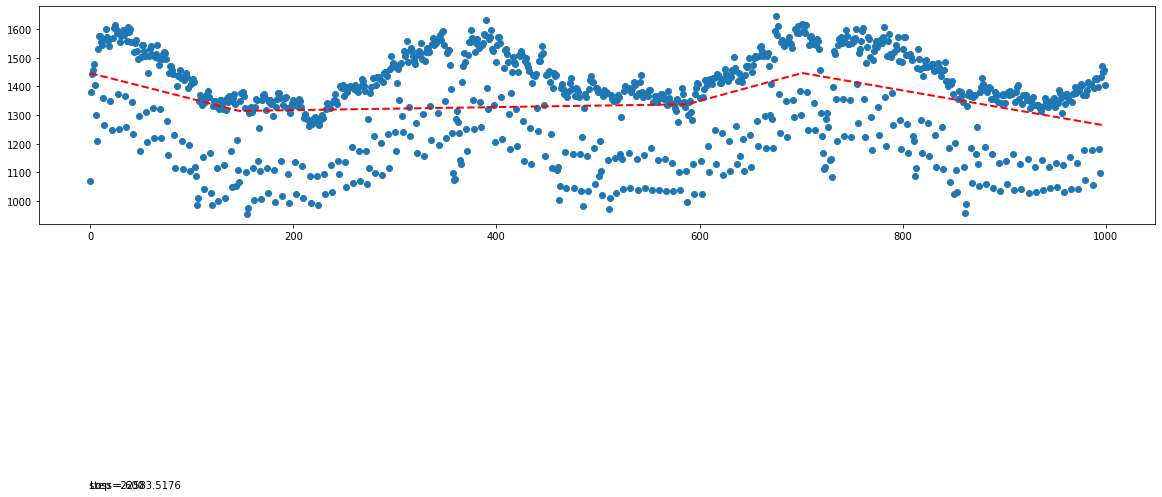

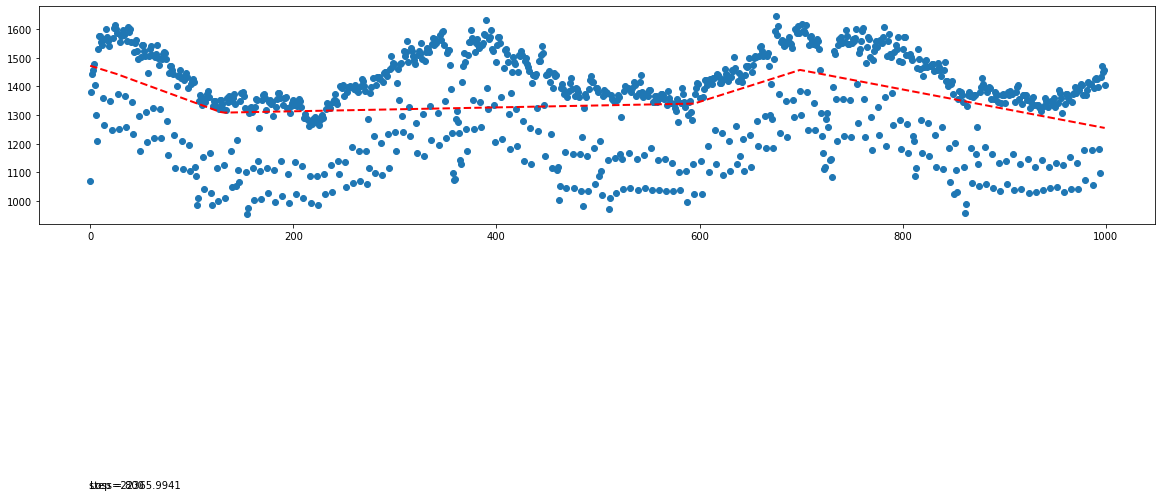

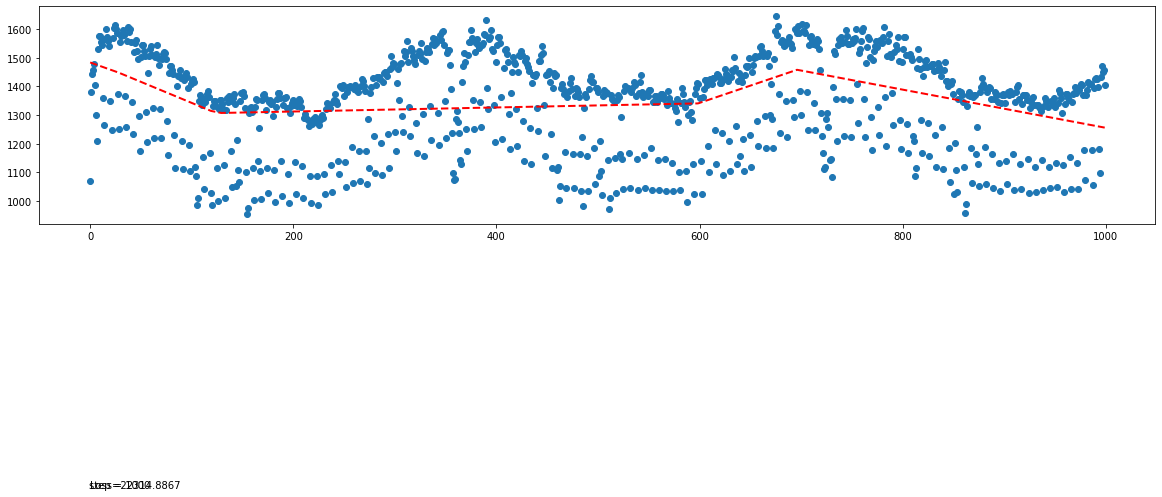

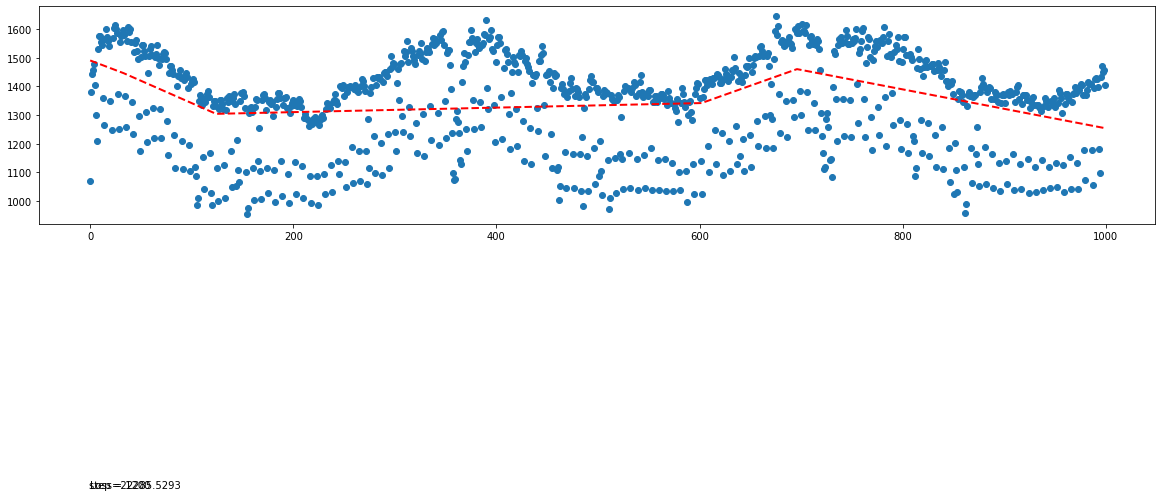

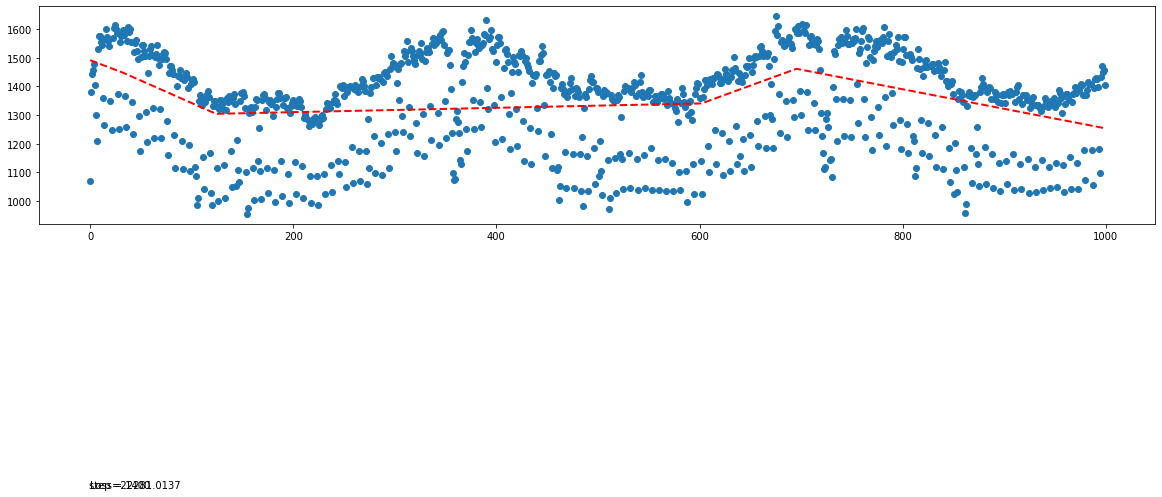

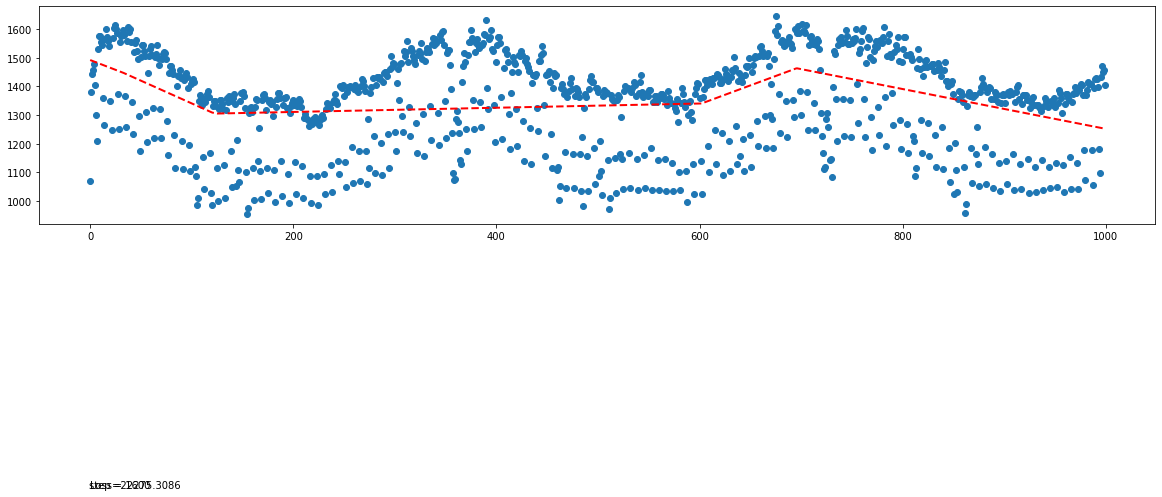

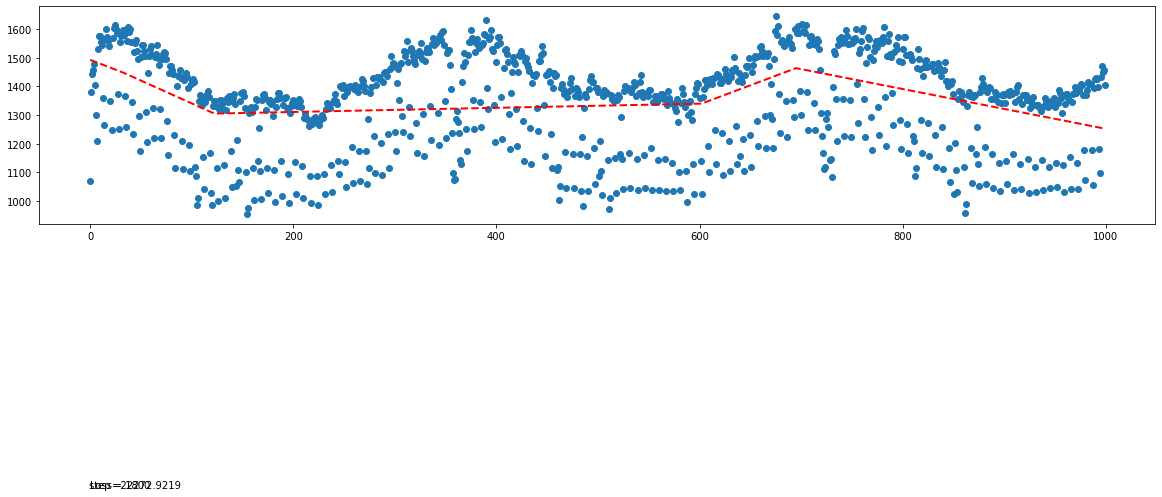

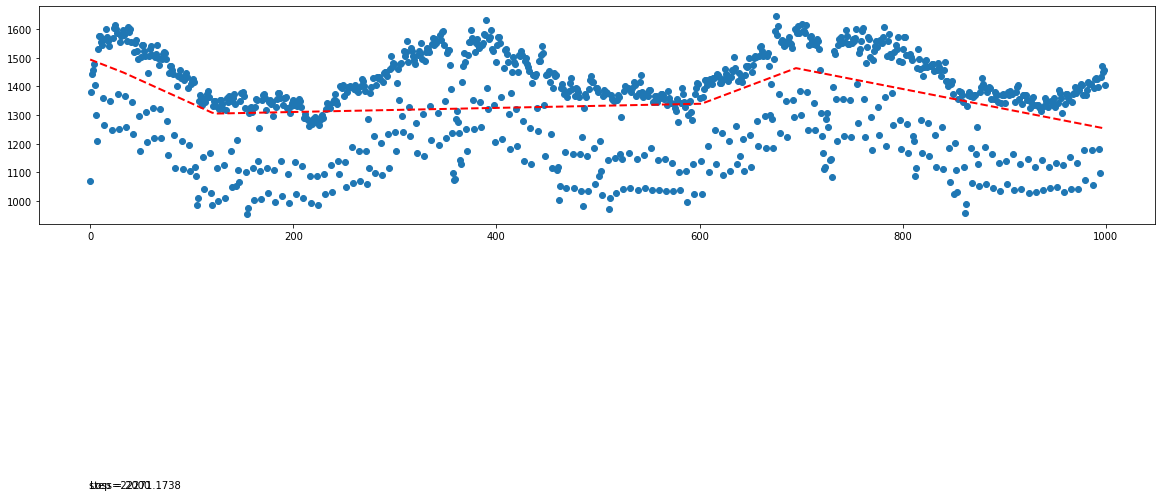

In [14]:
inputs = Variable(x)                          #1. deklarujemy x i y do nauki
outputs = Variable(y)
for i in range(2050):                          #2. pętla 1050 powtórzeń (epok)
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 200 == 0:                             #3. Pokazuje naukę co 100 kroków
       # plot and show learning process
       #plt.cla()
       plt.figure(figsize=(20,4))
       plt.scatter(x.data.numpy(), y.data.numpy())
       plt.plot(x.data.numpy(), prediction.data.numpy(), 'r--', lw=2)
       plt.text(0.15, 0.1, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'black'})
       plt.text(-0.95, -0.4, 'step = %d' % i, fontdict={'size': 10, 'color':  'black'})
       plt.pause(0.1)

plt.show()